<ipython-input-11-341b831aa20b>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("class")


Centroids:
         embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
class                                                                         
0     -0.187248  0.154952  0.111933  0.132193 -0.420970 -0.127159  0.170289   
1     -0.178022  0.162553  0.129765  0.195901 -0.439689 -0.155115  0.148794   
2     -0.118783  0.149586  0.101223  0.197351 -0.531008 -0.160432  0.189705   
3     -0.191641  0.113535  0.090526  0.208161 -0.478676 -0.188113  0.146024   
4     -0.198083  0.104167  0.107169  0.222668 -0.492183 -0.222307  0.120315   

        embed_7   embed_8   embed_9  ...  embed_374  embed_375  embed_376  \
class                                ...                                    
0      0.075671  0.145825 -0.056672  ...   0.294117  -0.357193  -0.100923   
1      0.097545  0.164340 -0.037759  ...   0.296284  -0.334705  -0.077398   
2      0.138322  0.130674 -0.048746  ...   0.220483  -0.304967  -0.060916   
3      0.124297  0.135370 -0.051236  ...   0.2907

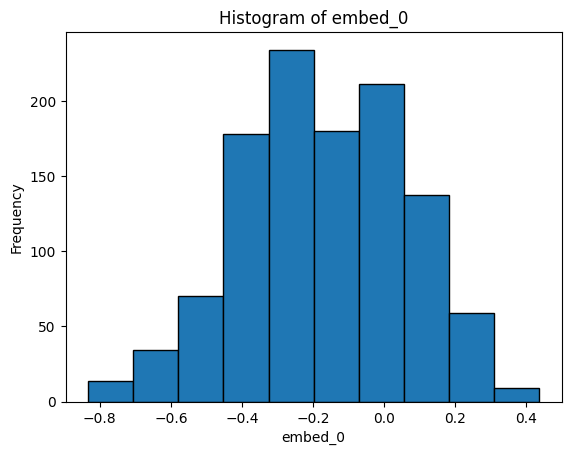

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925803


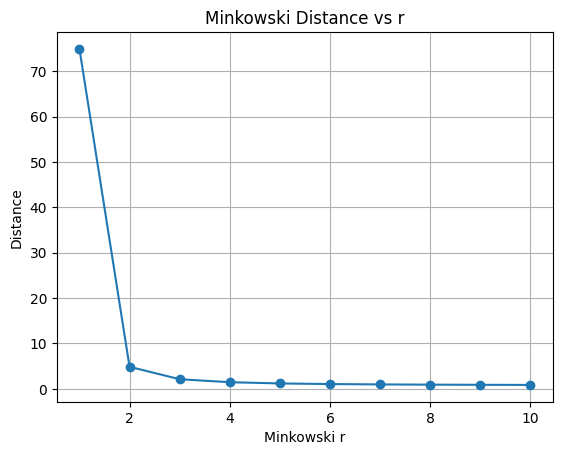

Model Accuracy with k=3: 0.6452
Accuracy with k=1 (NN Classifier): 0.6774
Accuracy with k=3 (k-NN Classifier): 0.6452


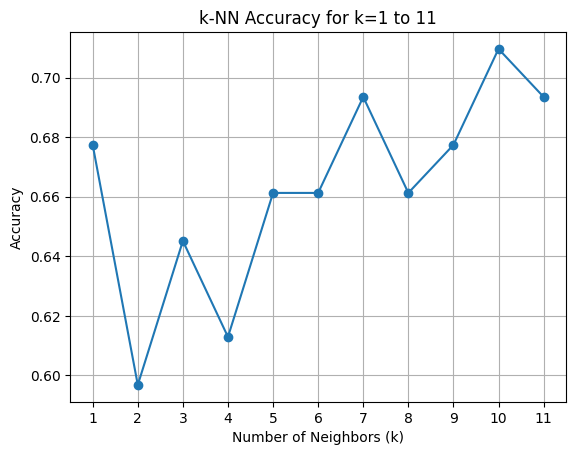

Confusion Matrix (Training Data):
 [[33 23]
 [ 8 80]]
Confusion Matrix (Test Data):
 [[10 15]
 [ 7 30]]
Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.80      0.59      0.68        56
           1       0.78      0.91      0.84        88

    accuracy                           0.78       144
   macro avg       0.79      0.75      0.76       144
weighted avg       0.79      0.78      0.78       144

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.59      0.40      0.48        25
           1       0.67      0.81      0.73        37

    accuracy                           0.65        62
   macro avg       0.63      0.61      0.60        62
weighted avg       0.64      0.65      0.63        62

The model appears to be well-fitted.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def load_and_preprocess_data(filepath):
  """Loads dataset, bins output scores into classes, and removes the original output column."""
  df = pd.read_excel(filepath)
  bins = [0, 1, 2, 3, 4, 5]  # Bin edges
  labels = [0, 1, 2, 3, 4]  # Class labels
  df["class"] = pd.cut(df["output"], bins=bins, labels=labels, include_lowest=True)
  df.drop(columns=["output"], inplace=True)
  return df

def compute_class_statistics(df):
  """Computes centroids (mean) and spread (standard deviation) for each class."""
  grouped = df.groupby("class")
  centroids = grouped.mean()
  spread = grouped.std()
  return centroids, spread

def compute_centroid_distance(centroids, class1=0, class2=4):
  """Computes the Euclidean distance between centroids of two selected classes."""
  centroid1, centroid2 = centroids.loc[class1].values, centroids.loc[class2].values
  return np.linalg.norm(centroid1 - centroid2)

def plot_feature_histogram(df, feature):
  """Plots histogram of a selected feature and computes mean and variance."""
  data = df[feature]
  plt.hist(data, bins=10, edgecolor='black')
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {feature}")
  plt.show()
  return np.mean(data), np.var(data)

def compute_minkowski_distance(df, feature_cols):
  """Computes Minkowski distance between two vectors for r values from 1 to 10."""
  vector1, vector2 = df.iloc[0][feature_cols].values, df.iloc[1][feature_cols].values
  r_values = range(1, 11)
  distances = [minkowski(vector1, vector2, r) for r in r_values]
  plt.plot(r_values, distances, marker='o', linestyle='-')
  plt.xlabel("Minkowski r")
  plt.ylabel("Distance")
  plt.title("Minkowski Distance vs r")
  plt.grid()
  plt.show()

def prepare_training_data(df, selected_classes, test_size=0.3, random_state=21):
  """Filters dataset to selected classes and splits into training and testing sets."""
  df = df[df["class"].isin(selected_classes)]
  X, y = df.drop(columns=["class"]).values, df["class"].values
  return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_knn_classifier(X_train, y_train, k=3):
  """Trains a k-NN classifier with given k."""
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  return knn

def evaluate_knn(knn, X_test, y_test):
  """Evaluates the k-NN classifier and returns accuracy."""
  return knn.score(X_test, y_test)

def plot_knn_accuracy(X_train, X_test, y_train, y_test):
  """Trains k-NN classifiers for k=1 to 11 and plots accuracy."""
  k_values = range(1, 12)
  accuracy_scores = []
  for k in k_values:
      knn = train_knn_classifier(X_train, y_train, k)
      accuracy_scores.append(evaluate_knn(knn, X_test, y_test))
  plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
  plt.xlabel("Number of Neighbors (k)")
  plt.ylabel("Accuracy")
  plt.title("k-NN Accuracy for k=1 to 11")
  plt.xticks(k_values)
  plt.grid(True)
  plt.show()

def evaluate_classification_performance(knn, X_train, X_test, y_train, y_test):
  """Computes and prints confusion matrix and classification report for train and test sets."""
  y_train_pred, y_test_pred = knn.predict(X_train), knn.predict(X_test)
  print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train, y_train_pred))
  print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_pred))
  print("Classification Report (Training Data):\n", classification_report(y_train, y_train_pred))
  print("Classification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# Main Execution
filepath = "/training_mathbert.xlsx"
df = load_and_preprocess_data(filepath)
centroids, spread = compute_class_statistics(df)
distance = compute_centroid_distance(centroids)
print("Centroids:\n", centroids)
print("\nSpread:\n", spread)
print("\nDistance between Class 0 and Class 4 centroids:", distance)

# Feature Histogram
feature = "embed_0"
mean_val, variance_val = plot_feature_histogram(df, feature)
print(f"Mean of {feature}: {mean_val}")
print(f"Variance of {feature}: {variance_val}")

# Minkowski Distance
feature_cols = [f'embed_{i}' for i in range(384)]
compute_minkowski_distance(df, feature_cols)

# Prepare Data for Training
selected_classes=[0, 1]
X_train, X_test, y_train, y_test = prepare_training_data(df,selected_classes)

# Train and Evaluate k-NN
knn = train_knn_classifier(X_train, y_train, k=3)
accuracy_k3_testing = evaluate_knn(knn, X_test, y_test)
accuracy_k3_training = evaluate_knn(knn, X_train, y_train)
print(f"Model Accuracy with k=3: {accuracy_k3_testing:.4f}")

# Compare k=1 and k=3
knn_1 = train_knn_classifier(X_train, y_train, k=1)
accuracy_k1 = evaluate_knn(knn_1, X_test, y_test)
print(f"Accuracy with k=1 (NN Classifier): {accuracy_k1:.4f}")
print(f"Accuracy with k=3 (k-NN Classifier): {accuracy_k3_testing:.4f}")

# Accuracy Plot for k=1 to 11
plot_knn_accuracy(X_train, X_test, y_train, y_test)

# Evaluate Model Performance
evaluate_classification_performance(knn, X_train, X_test, y_train, y_test)

if accuracy_k3_testing < 0.6:
    print("The model is likely underfitting. Consider adding more features or using a more complex model.")
elif accuracy_k3_testing > 0.9 and accuracy_k3_training < 0.7:
    print("The model may be overfitting. Consider adding regularization or reducing k.")
else:
    print("The model appears to be well-fitted.")
